In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm
import pysam
from Bio.Seq import Seq

In [2]:
import json
f = open('/home/mark/Desktop/chromosome_y/json_dict/T2T_cluster.json') 
T2T_dict = json.load(f) 

In [3]:
T2T_startStopDict = {key:[] for key in T2T_dict.keys()}
for key in T2T_startStopDict.keys():
    T2T_startStopDict[key].append(T2T_dict[key][0][0].split(" ")[5].strip())
    T2T_startStopDict[key].append(T2T_dict[key][-1][-1].split(" ")[6].strip())

In [4]:
T2T_startStopDict

{'0': ['28660073', '28686560'],
 '1': ['29200666', '29239364'],
 '2': ['29320751', '29356076'],
 '3': ['30970141', '31197826'],
 '4': ['31849744', '32018110'],
 '5': ['32840470', '33089756'],
 '6': ['33304751', '33544621'],
 '7': ['34544016', '35727720'],
 '8': ['36090299', '36170539'],
 '9': ['36446096', '36601337'],
 '10': ['36962296', '37064473'],
 '11': ['37332529', '37586845'],
 '12': ['38042676', '38272786'],
 '13': ['38635464', '38727799'],
 '14': ['39006879', '39169384'],
 '15': ['39473476', '39590171'],
 '16': ['39897297', '40183034'],
 '17': ['40686702', '41531223'],
 '18': ['42579144', '43446244'],
 '19': ['43798098', '43921861'],
 '20': ['44190151', '44347801'],
 '21': ['44648351', '44762618'],
 '22': ['45144310', '45495331'],
 '23': ['45988930', '46763256'],
 '24': ['47729648', '48109787'],
 '25': ['48408367', '48709963'],
 '26': ['49228330', '49887072'],
 '27': ['50225315', '50896753'],
 '28': ['51291660', '51546390'],
 '29': ['52073102', '52251131'],
 '30': ['52851656', 

In [5]:
samtools='chrY'
with open('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/finalized/T2T.ChrY.Final.fasta.out') as f:
    Lines = f.readlines()
    myLines = []
    lineNum = 0

    for line in tqdm(Lines): 
        
        goodLine = ' '.join(line.split())
        
        myLines.append(goodLine)

100%|█████████████████████████████████| 29612/29612 [00:00<00:00, 473456.07it/s]


In [6]:
myLines2 = myLines.copy()
myLines3 = myLines.copy()

In [7]:
NRB_Blocks={}
i = 0
firstFlag = 0
keyList = list(T2T_startStopDict.keys())
myKey = 0

for key in tqdm(keyList):
    
    if firstFlag == 0:
    
        NRB_Blocks[key]=str(27462682)+"-"+str(int(T2T_startStopDict[key][0])-1)

        firstFlag=1
        myKey+=1
                
    else:
        
        NRB_Blocks[key]=str(int(T2T_startStopDict[str(int(key)-1)][1])+1)+"-"+str(int(T2T_startStopDict[key][0])-1)
            

100%|███████████████████████████████████████| 46/46 [00:00<00:00, 290132.31it/s]


In [8]:
NRB_Blocks.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45'])

In [9]:
import collections
templist = []

for key in list(NRB_Blocks.keys())[:-3]:
    templist.append([key, 'Spacer Block', (int(NRB_Blocks[key].split("-")[1])-int(NRB_Blocks[key].split("-")[0]))+1, int(NRB_Blocks[key].split("-")[0]), int(NRB_Blocks[key].split("-")[1])])
    templist.append([key, 'Repeat Block', (int(T2T_startStopDict[key][1])-int(T2T_startStopDict[str(key)][0]))+1, int(T2T_startStopDict[key][0]), int(T2T_startStopDict[key][1])])
    
tempDF = pd.DataFrame(data=templist, columns=['Block_Number','Block_Type','Length','Start','End'])
tempDF['SampleName']='HG002'

In [10]:
tempDF

,Block_Number,Block_Type,Length,Start,End,SampleName
0,0,Spacer Block,1197391,27462682,28660072,HG002
1,0,Repeat Block,26488,28660073,28686560,HG002
2,1,Spacer Block,514105,28686561,29200665,HG002
3,1,Repeat Block,38699,29200666,29239364,HG002
4,2,Spacer Block,81386,29239365,29320750,HG002
...,...,...,...,...,...,...
81,40,Repeat Block,61620,61389881,61451500,HG002
82,41,Spacer Block,239710,61451501,61691210,HG002
83,41,Repeat Block,23386,61691211,61714596,HG002
84,42,Spacer Block,287520,61714597,62002116,HG002


In [15]:
#Pull the sequences for the spacer blocks
#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/HG002_spacerSequences.fasta', 'a+') as file:
    for row in tempDF.index:
        if str(tempDF.at[row,'Block_Type']) == 'Spacer Block':
            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/T2T.chrY.fasta', "chrY:"+str(tempDF.at[row,'Start'])+"-"+str(tempDF.at[row,'End'])))
        else:
            continue

file.close()

## Load in HaeIII Restriction Data

In [2]:
#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/HG002_digestion.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/HG002_digestion_cleaned.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                start=int(line.split("chrY:")[1].split(",")[0].split("-")[0]) 
                cord1=int(line.split("base")[1].split(" ")[1])
                cord2=int(line.split("base")[2].split(" ")[1])
                file2.write(">chrY:"+str(start+cord1)+"-"+str(start+cord2)+'\n')
            else:
                file2.write(line)
    file2.close()
file.close()


100%|██████████████████████████████| 354266/354266 [00:00<00:00, 1080091.60it/s]


In [11]:
spacerDictionary = {}
for key in NRB_Blocks.keys():
    spacerDictionary[str(samtools)+":"+str(NRB_Blocks[key])]=key
    #spacerDictionary["HC02666:"+str(NRB_Blocks[key])]=key
spacerDictionary

{'chrY:27462682-28660072': '0',
 'chrY:28686561-29200665': '1',
 'chrY:29239365-29320750': '2',
 'chrY:29356077-30970140': '3',
 'chrY:31197827-31849743': '4',
 'chrY:32018111-32840469': '5',
 'chrY:33089757-33304750': '6',
 'chrY:33544622-34544015': '7',
 'chrY:35727721-36090298': '8',
 'chrY:36170540-36446095': '9',
 'chrY:36601338-36962295': '10',
 'chrY:37064474-37332528': '11',
 'chrY:37586846-38042675': '12',
 'chrY:38272787-38635463': '13',
 'chrY:38727800-39006878': '14',
 'chrY:39169385-39473475': '15',
 'chrY:39590172-39897296': '16',
 'chrY:40183035-40686701': '17',
 'chrY:41531224-42579143': '18',
 'chrY:43446245-43798097': '19',
 'chrY:43921862-44190150': '20',
 'chrY:44347802-44648350': '21',
 'chrY:44762619-45144309': '22',
 'chrY:45495332-45988929': '23',
 'chrY:46763257-47729647': '24',
 'chrY:48109788-48408366': '25',
 'chrY:48709964-49228329': '26',
 'chrY:49887073-50225314': '27',
 'chrY:50896754-51291659': '28',
 'chrY:51546391-52073101': '29',
 'chrY:52251132-5285

In [12]:
spacerDictionary2 = {}
for key in NRB_Blocks.keys():
    spacerDictionary2["HG002:"+str(NRB_Blocks[key])]=key
spacerDictionary2

{'HG002:27462682-28660072': '0',
 'HG002:28686561-29200665': '1',
 'HG002:29239365-29320750': '2',
 'HG002:29356077-30970140': '3',
 'HG002:31197827-31849743': '4',
 'HG002:32018111-32840469': '5',
 'HG002:33089757-33304750': '6',
 'HG002:33544622-34544015': '7',
 'HG002:35727721-36090298': '8',
 'HG002:36170540-36446095': '9',
 'HG002:36601338-36962295': '10',
 'HG002:37064474-37332528': '11',
 'HG002:37586846-38042675': '12',
 'HG002:38272787-38635463': '13',
 'HG002:38727800-39006878': '14',
 'HG002:39169385-39473475': '15',
 'HG002:39590172-39897296': '16',
 'HG002:40183035-40686701': '17',
 'HG002:41531224-42579143': '18',
 'HG002:43446245-43798097': '19',
 'HG002:43921862-44190150': '20',
 'HG002:44347802-44648350': '21',
 'HG002:44762619-45144309': '22',
 'HG002:45495332-45988929': '23',
 'HG002:46763257-47729647': '24',
 'HG002:48109788-48408366': '25',
 'HG002:48709964-49228329': '26',
 'HG002:49887073-50225314': '27',
 'HG002:50896754-51291659': '28',
 'HG002:51546391-5207310

In [13]:
SpacerBlocks={x:[] for x in spacerDictionary.values()}
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/HG002_Headers.txt') as f:
    Lines = f.readlines()
    
    for line in tqdm(Lines):
        #print(line)
        SpacerBlocks[spacerDictionary[line.split(" ")[7].split(",")[0]]].append(str(line.split(" ")[0].split(">")[1])+"_"+str(int(line.split(" ")[7].split(",")[0].split(":")[1].split("-")[0])+int(line.split(" ")[9]))+"-"+str(int(line.split(" ")[7].split(",")[0].split(":")[1].split("-")[0])+int(line.split(" ")[12])))
    f.close()
SpacerBlockList = []
for key in SpacerBlocks.keys():
    for item in SpacerBlocks[key]:
        SpacerBlockList.append([int(key), int(item.split("_")[0]), int(item.split("_")[1].split("-")[0]), int(item.split("_")[1].split("-")[1])])

        tempDF = pd.DataFrame(data=SpacerBlockList, columns=['SpacerBlock','Length','Start','End'])
group = tempDF.groupby("SpacerBlock")
sort_function = lambda x: x.sort_values(by="Start", ascending = True)
desired_df = group.apply(sort_function)

100%|███████████████████████████████████| 5693/5693 [00:00<00:00, 190779.66it/s]


In [14]:
desired_df

SpacerBlock  Length     Start       End
SpacerBlock                                              
0           0               0  154032  27462683  27616714
            239             0    1118  27616715  27617832
            218             0    2018  27617833  27619850
            244             0    1109  27619851  27620959
            215             0    2027  27620960  27622986
...                       ...     ...       ...       ...
42          5679           42    3496  61987895  61991390
            5674           42    3499  61991391  61994889
            5664           42    3544  61994890  61998433
            5665           42    3533  61998434  62001966
            5692           42     151  62001967  62002117

[5693 rows x 4 columns]

In [15]:
#desired_df.to_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/HG002_fragmentLengths.csv")

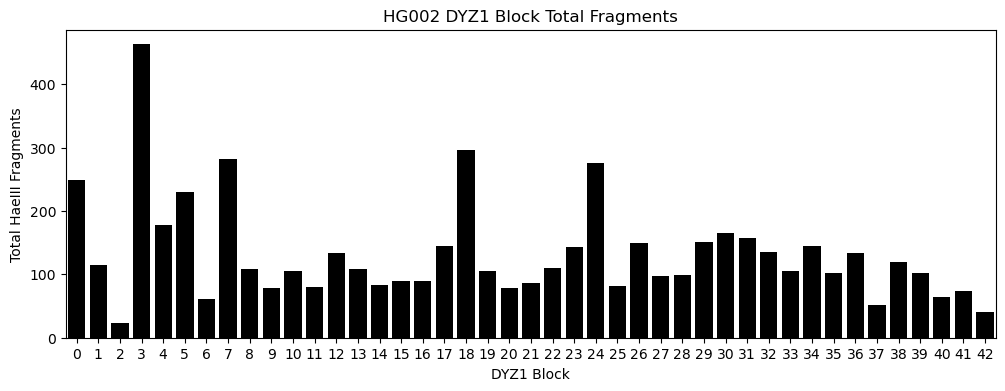

In [19]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 12,4
barplotList = []
for key in SpacerBlocks.keys():
    if int(key) < 43:
        barplotList.append([key, len(desired_df[desired_df['SpacerBlock']==int(key)])])
barplotDF = pd.DataFrame(data=barplotList, columns=['SpacerBlock','Total Fragments'])
sns.barplot(data=barplotDF, x='SpacerBlock', y='Total Fragments', color='black')
plt.title("HG002 DYZ1 Block Total Fragments")
plt.xlabel("DYZ1 Block")
plt.ylabel("Total HaeIII Fragments")
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/DYZ1/HaeIII_Fragments/HG002_HaeIII_TotalFragments.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [17]:
print("Mean: "+str(np.mean(desired_df[desired_df['SpacerBlock']<43]['Length'])))
print("Median: "+str(np.median(desired_df[desired_df['SpacerBlock']<43]['Length'])))

Mean: 3582.2297558405057
Median: 3554.0


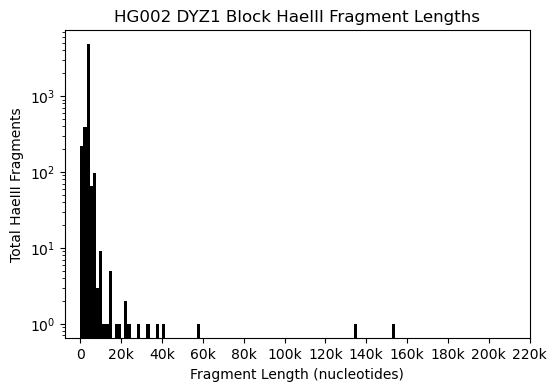

In [21]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 6,4
plt.hist(desired_df[desired_df['SpacerBlock']<43]['Length'], log=True, bins=100, color='black')
plt.title("HG002 DYZ1 Block HaeIII Fragment Lengths")
plt.xlabel("Fragment Length (nucleotides)")
plt.ylabel("Total HaeIII Fragments")
x = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 220000]
labels = ['0', '20k', '40k', '60k', '80k', '100k', '120k', '140k', '160k', '180k', '200k', '220k']
  
plt.xticks(x, labels, rotation ='horizontal')

#plt.savefig("/home/mark/Desktop/chromosome_y/Images/DYZ1/HaeIII_Fragments/HG002_HaeIII_Fragments.pdf", dpi=300, bbox_inches='tight')
plt.show()

## Import Repeatmasker and Visualize

In [22]:
desired_df['Coordinates']='temp'
for row in desired_df.index:
    desired_df.at[row,'Coordinates']='chrY:'+str(desired_df.at[row,'Start'])+"-"+str(desired_df.at[row,'End'])

In [23]:
desired_df2 = desired_df.set_index("Coordinates").copy()
desired_df2

,SpacerBlock,Length,Start,End
Coordinates,,,,
chrY:27462683-27616714,0,154032,27462683,27616714
chrY:27616715-27617832,0,1118,27616715,27617832
chrY:27617833-27619850,0,2018,27617833,27619850
chrY:27619851-27620959,0,1109,27619851,27620959
chrY:27620960-27622986,0,2027,27620960,27622986
...,...,...,...,...
chrY:61987895-61991390,42,3496,61987895,61991390
chrY:61991391-61994889,42,3499,61991391,61994889
chrY:61994890-61998433,42,3544,61994890,61998433


In [24]:
sampleDict = {x:'+' for x in desired_df2.index}

In [25]:
spaceBlockDict = {x:{} for x in spacerDictionary.values()}
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/HG002_digestion_cleaned.fasta.out') as f:
    Lines = f.readlines()
    
    for line in tqdm(Lines):
        
        goodLine = ' '.join(line.split())
        if 'HSATII' in goodLine:
            #print(goodLine)
            sampleDict[str(goodLine.split(" ")[4])]=str(goodLine.split(" ")[8])
        else:
            continue
        
    f.close()

100%|█████████████████████████████████| 59829/59829 [00:00<00:00, 485267.44it/s]


In [26]:
sampleDict

{'chrY:27462683-27616714': 'C',
 'chrY:27616715-27617832': 'C',
 'chrY:27617833-27619850': 'C',
 'chrY:27619851-27620959': 'C',
 'chrY:27620960-27622986': 'C',
 'chrY:27622987-27625685': 'C',
 'chrY:27625686-27628816': 'C',
 'chrY:27628817-27629930': 'C',
 'chrY:27629931-27631947': 'C',
 'chrY:27631948-27635068': 'C',
 'chrY:27635069-27636182': 'C',
 'chrY:27636183-27638209': 'C',
 'chrY:27638210-27642444': 'C',
 'chrY:27642445-27644461': 'C',
 'chrY:27644462-27647582': 'C',
 'chrY:27647583-27648696': 'C',
 'chrY:27648697-27650713': 'C',
 'chrY:27650714-27653834': 'C',
 'chrY:27653835-27654948': 'C',
 'chrY:27654949-27656975': 'C',
 'chrY:27656976-27661204': 'C',
 'chrY:27661205-27664311': 'C',
 'chrY:27664312-27666308': 'C',
 'chrY:27666309-27704739': 'C',
 'chrY:27704740-27710955': 'C',
 'chrY:27710956-27734780': 'C',
 'chrY:27734781-27753437': 'C',
 'chrY:27753438-27756544': 'C',
 'chrY:27756545-27891814': 'C',
 'chrY:27891815-27904939': 'C',
 'chrY:27904940-27908467': 'C',
 'chrY:2

In [27]:
desired_df2['Orientation']=[x for x in sampleDict.values()]
desired_df2

,SpacerBlock,Length,Start,End,Orientation
Coordinates,,,,,
chrY:27462683-27616714,0,154032,27462683,27616714,C
chrY:27616715-27617832,0,1118,27616715,27617832,C
chrY:27617833-27619850,0,2018,27617833,27619850,C
chrY:27619851-27620959,0,1109,27619851,27620959,C
chrY:27620960-27622986,0,2027,27620960,27622986,C
...,...,...,...,...,...
chrY:61987895-61991390,42,3496,61987895,61991390,C
chrY:61991391-61994889,42,3499,61991391,61994889,C
chrY:61994890-61998433,42,3544,61994890,61998433,C


In [28]:
#desired_df2 = desired_df[desired_df['SpacerBlock']<23].copy()
#desired_df2['Orientation']='temp'
desired_df2['Color']='black'

In [29]:
for row in desired_df2.index:
    if desired_df2.at[row,'Orientation'] == '+':
        desired_df2.at[row,'Color']='blue'
    elif desired_df2.at[row,'Orientation'] == 'C':
        desired_df2.at[row,'Color']='red'
    else:
        continue

In [30]:
desired_df2

,SpacerBlock,Length,Start,End,Orientation,Color
Coordinates,,,,,,
chrY:27462683-27616714,0,154032,27462683,27616714,C,red
chrY:27616715-27617832,0,1118,27616715,27617832,C,red
chrY:27617833-27619850,0,2018,27617833,27619850,C,red
chrY:27619851-27620959,0,1109,27619851,27620959,C,red
chrY:27620960-27622986,0,2027,27620960,27622986,C,red
...,...,...,...,...,...,...
chrY:61987895-61991390,42,3496,61987895,61991390,C,red
chrY:61991391-61994889,42,3499,61991391,61994889,C,red
chrY:61994890-61998433,42,3544,61994890,61998433,C,red


In [31]:
print(collections.Counter(desired_df2['Orientation']))
print(collections.Counter(desired_df2['Color']))

Counter({'C': 5512, '+': 181})
Counter({'red': 5512, 'blue': 181})


In [170]:
#####################################################################################

In [32]:
rb_df = desired_df2.copy()

# Clusters

In [33]:
import pysam
from Bio.Seq import Seq

In [34]:
def split(word):
    return [char for char in word]

tempList = {}

#All Rows
for row in rb_df.index:
    
    
    tempDict = {}
    
    sequence = (pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/T2T.chrY.fasta', "chrY:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End'])))

    if rb_df.at[row,'Color'] == 'blue':
        
        
        mySeq1 = sequence.split("chrY:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End']))[1].strip()
        seq = Seq(mySeq1)
        mySeq = split(seq.reverse_complement())
        
    else:
        #print(split(sequence.split("chrY:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End']))))
        mySeq = (split(sequence.split("chrY:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End']))[1].strip()))
    
    goodSeq = []
    for x in mySeq:
        if str(x) != '\n':
            goodSeq.append(str(x))
        else:
            continue

    
    i=0
    while i < len(goodSeq):
        
        if len(str(''.join(goodSeq[i:i+5])).strip()) > 4:
            if str(''.join(goodSeq[i:i+5])) in tempDict.keys():
                tempDict[str(''.join(goodSeq[i:i+5]))]+=1
            else:
                tempDict[str(''.join(goodSeq[i:i+5]))]=1

        i+=1
        
    tempList["chrY:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End'])]=tempDict


In [35]:
allKeys = []
for key in tempList.keys():
    for kmer in tempList[key]:
        if kmer in allKeys:
            continue
        else:
            allKeys.append(kmer)
            
kmerDF = pd.DataFrame(index=[x for x in tempList.keys()], columns=[x for x in set(allKeys)]).fillna(0)
kmerDF

,TTATG,GATGG,CGGAT,TAGGC,TACAA,AAGCC,CACAA,TTAGG,AGCCG,TCCCT,...,TCCAT,ACAAG,TCAGC,GGGTT,TCCCG,CTGCG,GAGAA,ATTAA,CGTCT,GTCGC
chrY:27462683-27616714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrY:27616715-27617832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrY:27617833-27619850,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrY:27619851-27620959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrY:27620960-27622986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY:61987895-61991390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrY:61991391-61994889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrY:61994890-61998433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrY:61998434-62001966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
for key in tqdm(tempList.keys()):
    for kmer in tempList[key]:
        kmerDF.at[str(key),str(kmer)]= int(tempList[key][kmer])
kmerDF

100%|██████████████████████████████████████| 5693/5693 [00:16<00:00, 351.42it/s]


,TTATG,GATGG,CGGAT,TAGGC,TACAA,AAGCC,CACAA,TTAGG,AGCCG,TCCCT,...,TCCAT,ACAAG,TCAGC,GGGTT,TCCCG,CTGCG,GAGAA,ATTAA,CGTCT,GTCGC
chrY:27462683-27616714,61,62,6,0,0,0,1,38,0,0,...,3,0,0,58,0,1,51,57,0,0
chrY:27616715-27617832,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
chrY:27617833-27619850,2,0,3,0,0,0,0,0,0,0,...,1,0,0,1,0,0,2,0,0,0
chrY:27619851-27620959,0,1,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
chrY:27620960-27622986,2,1,2,0,0,0,0,0,0,0,...,1,0,0,1,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY:61987895-61991390,3,2,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,2,3,0,1
chrY:61991391-61994889,2,2,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,2,3,0,0
chrY:61994890-61998433,1,3,0,0,1,0,1,0,0,0,...,1,1,0,0,0,0,3,4,0,0
chrY:61998434-62001966,3,2,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,4,4,0,0


In [37]:
def prevalenceFilter(df):
    dfo = df.copy()
    dfo2 = dfo.div(dfo.sum(axis=1), axis=0).copy()            
    return(dfo2)

In [38]:
import composition_stats as cs

In [39]:
def clrTransformation(df):
    #CLR Transform the relative abundnace dataframe
    df2 = df.copy()

    for row in df.index:
        df2.loc[row] = cs.clr(np.array(df.loc[row].replace(0.0, 1e-10)))
    
    return(df2)

In [40]:
abundanceKmer = prevalenceFilter(kmerDF)
abundanceKmer

,TTATG,GATGG,CGGAT,TAGGC,TACAA,AAGCC,CACAA,TTAGG,AGCCG,TCCCT,...,TCCAT,ACAAG,TCAGC,GGGTT,TCCCG,CTGCG,GAGAA,ATTAA,CGTCT,GTCGC
chrY:27462683-27616714,0.000396,0.000403,0.000039,0.0,0.000000,0.0,0.000006,0.000247,0.0,0.0,...,0.000019,0.000000,0.0,0.000377,0.0,0.000006,0.000331,0.000370,0.0,0.000000
chrY:27616715-27617832,0.000000,0.000898,0.000000,0.0,0.000000,0.0,0.000000,0.000898,0.0,0.0,...,0.000000,0.000000,0.0,0.000898,0.0,0.000000,0.000000,0.000898,0.0,0.000000
chrY:27617833-27619850,0.000993,0.000000,0.001490,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000497,0.000000,0.0,0.000497,0.0,0.000000,0.000993,0.000000,0.0,0.000000
chrY:27619851-27620959,0.000000,0.000905,0.000905,0.0,0.000000,0.0,0.000000,0.000905,0.0,0.0,...,0.000000,0.000000,0.0,0.000905,0.0,0.000000,0.000000,0.000905,0.0,0.000000
chrY:27620960-27622986,0.000989,0.000494,0.000989,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000494,0.000000,0.0,0.000494,0.0,0.000000,0.000989,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY:61987895-61991390,0.000859,0.000573,0.000000,0.0,0.000286,0.0,0.000286,0.000000,0.0,0.0,...,0.000000,0.000286,0.0,0.000000,0.0,0.000000,0.000573,0.000859,0.0,0.000286
chrY:61991391-61994889,0.000572,0.000572,0.000000,0.0,0.000000,0.0,0.000286,0.000000,0.0,0.0,...,0.000000,0.000286,0.0,0.000000,0.0,0.000000,0.000572,0.000858,0.0,0.000000
chrY:61994890-61998433,0.000282,0.000847,0.000000,0.0,0.000282,0.0,0.000282,0.000000,0.0,0.0,...,0.000282,0.000282,0.0,0.000000,0.0,0.000000,0.000847,0.001130,0.0,0.000000
chrY:61998434-62001966,0.000850,0.000567,0.000000,0.0,0.000000,0.0,0.000283,0.000000,0.0,0.0,...,0.000000,0.000283,0.0,0.000000,0.0,0.000000,0.001133,0.001133,0.0,0.000000


In [41]:
CLR_KMER = clrTransformation(abundanceKmer)

In [42]:
CLR_KMER.index.name ='SampleName'

In [43]:
for row in rb_df.index:
    if 'chrY:'+str(rb_df.at[row,'Start'])+"-"+str(rb_df.at[row,'End']) in CLR_KMER.index:
        CLR_KMER.at['chrY:'+str(rb_df.at[row,'Start'])+"-"+str(rb_df.at[row,'End']), 'Color'] = str(rb_df.at[row,'Color'])
CLR_KMER

,TTATG,GATGG,CGGAT,TAGGC,TACAA,AAGCC,CACAA,TTAGG,AGCCG,TCCCT,...,ACAAG,TCAGC,GGGTT,TCCCG,CTGCG,GAGAA,ATTAA,CGTCT,GTCGC,Color
SampleName,,,,,,,,,,,,,,,,,,,,,
chrY:27462683-27616714,5.411357,5.427618,3.092243,-9.780478,-9.780478,-9.780478,1.300483,4.938069,-9.780478,-9.780478,...,-9.780478,-9.780478,5.360926,-9.780478,1.300483,5.232309,5.343535,-9.780478,-9.780478,red
chrY:27616715-27617832,-5.144358,10.865781,-5.144358,-5.144358,-5.144358,-5.144358,-5.144358,10.865781,-5.144358,-5.144358,...,-5.144358,-5.144358,10.865781,-5.144358,-5.144358,-5.144358,10.865781,-5.144358,-5.144358,red
chrY:27617833-27619850,10.223560,-5.887560,10.629025,-5.887560,-5.887560,-5.887560,-5.887560,-5.887560,-5.887560,-5.887560,...,-5.887560,-5.887560,9.530413,-5.887560,-5.887560,10.223560,-5.887560,-5.887560,-5.887560,red
chrY:27619851-27620959,-5.272016,10.746234,10.746234,-5.272016,-5.272016,-5.272016,-5.272016,10.746234,-5.272016,-5.272016,...,-5.272016,-5.272016,10.746234,-5.272016,-5.272016,-5.272016,10.746234,-5.272016,-5.272016,red
chrY:27620960-27622986,10.294369,9.601222,10.294369,-5.812292,-5.812292,-5.812292,-5.812292,-5.812292,-5.812292,-5.812292,...,-5.812292,-5.812292,9.601222,-5.812292,-5.812292,10.294369,-5.812292,-5.812292,-5.812292,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY:61987895-61991390,8.747748,8.342283,-7.218485,-7.218485,7.649136,-7.218485,7.649136,-7.218485,-7.218485,-7.218485,...,7.649136,-7.218485,-7.218485,-7.218485,-7.218485,8.342283,8.747748,-7.218485,7.649136,red
chrY:61991391-61994889,8.350014,8.350014,-7.209896,-7.209896,-7.209896,-7.209896,7.656866,-7.209896,-7.209896,-7.209896,...,7.656866,-7.209896,-7.209896,-7.209896,-7.209896,8.350014,8.755479,-7.209896,-7.209896,red
chrY:61994890-61998433,7.496793,8.595406,-7.357176,-7.357176,7.496793,-7.357176,7.496793,-7.357176,-7.357176,-7.357176,...,7.496793,-7.357176,-7.357176,-7.357176,-7.357176,8.595406,8.883088,-7.357176,-7.357176,red


In [44]:
set(CLR_KMER['Color'])

{'blue', 'red'}

In [45]:
##################### Bray-Curtis distance ##################

In [46]:
from scipy.spatial import distance

In [47]:
fragmentList = [x for x in kmerDF.index]
fragmentList

['chrY:27462683-27616714',
 'chrY:27616715-27617832',
 'chrY:27617833-27619850',
 'chrY:27619851-27620959',
 'chrY:27620960-27622986',
 'chrY:27622987-27625685',
 'chrY:27625686-27628816',
 'chrY:27628817-27629930',
 'chrY:27629931-27631947',
 'chrY:27631948-27635068',
 'chrY:27635069-27636182',
 'chrY:27636183-27638209',
 'chrY:27638210-27642444',
 'chrY:27642445-27644461',
 'chrY:27644462-27647582',
 'chrY:27647583-27648696',
 'chrY:27648697-27650713',
 'chrY:27650714-27653834',
 'chrY:27653835-27654948',
 'chrY:27654949-27656975',
 'chrY:27656976-27661204',
 'chrY:27661205-27664311',
 'chrY:27664312-27666308',
 'chrY:27666309-27704739',
 'chrY:27704740-27710955',
 'chrY:27710956-27734780',
 'chrY:27734781-27753437',
 'chrY:27753438-27756544',
 'chrY:27756545-27891814',
 'chrY:27891815-27904939',
 'chrY:27904940-27908467',
 'chrY:27908468-27912011',
 'chrY:27912012-27915580',
 'chrY:27915581-27919109',
 'chrY:27919110-27922683',
 'chrY:27922684-27926212',
 'chrY:27926213-27929786',
 

In [48]:
OrientationDict = {}
for row in rb_df.index:
    OrientationDict['chrY:'+str(rb_df.at[row,'Start'])+'-'+str(rb_df.at[row,'End'])] = str(rb_df.at[row,'Orientation'])
OrientationDict

{'chrY:27462683-27616714': 'C',
 'chrY:27616715-27617832': 'C',
 'chrY:27617833-27619850': 'C',
 'chrY:27619851-27620959': 'C',
 'chrY:27620960-27622986': 'C',
 'chrY:27622987-27625685': 'C',
 'chrY:27625686-27628816': 'C',
 'chrY:27628817-27629930': 'C',
 'chrY:27629931-27631947': 'C',
 'chrY:27631948-27635068': 'C',
 'chrY:27635069-27636182': 'C',
 'chrY:27636183-27638209': 'C',
 'chrY:27638210-27642444': 'C',
 'chrY:27642445-27644461': 'C',
 'chrY:27644462-27647582': 'C',
 'chrY:27647583-27648696': 'C',
 'chrY:27648697-27650713': 'C',
 'chrY:27650714-27653834': 'C',
 'chrY:27653835-27654948': 'C',
 'chrY:27654949-27656975': 'C',
 'chrY:27656976-27661204': 'C',
 'chrY:27661205-27664311': 'C',
 'chrY:27664312-27666308': 'C',
 'chrY:27666309-27704739': 'C',
 'chrY:27704740-27710955': 'C',
 'chrY:27710956-27734780': 'C',
 'chrY:27734781-27753437': 'C',
 'chrY:27753438-27756544': 'C',
 'chrY:27756545-27891814': 'C',
 'chrY:27891815-27904939': 'C',
 'chrY:27904940-27908467': 'C',
 'chrY:2

In [49]:
#All Rows

def split(word):
    return [char for char in word]

tempList = {}

for (dirpath, dirnames, filenames) in walk("/home/mark/Desktop/chromosome_y/centReferences/references/"):
    for name in filenames:
        print(name)
        
        file1 = open('/home/mark/Desktop/chromosome_y/centReferences/references/'+name, 'r')
        Lines = file1.readlines()

        tempDict = {}


        for line in tqdm(Lines): 
            
            if '>' in line:
                continue
            else:
                
                if 'DYZ1_' in name:
                    
                    seq = Seq(line.strip())
                    mySeq = split(seq.reverse_complement())
                    
                    goodSeq = []
                    for x in mySeq:
                        if str(x) != 'n':
                            goodSeq.append(str(x))
                        else:
                            continue

                    i=0
                    while i < len(goodSeq):

                        if len(str(''.join(goodSeq[i:i+5])).strip()) > 4:
                            
                            if str(''.join(goodSeq[i:i+5])) in tempDict.keys():
                                tempDict[str(''.join(goodSeq[i:i+5]))]+=1
                            else:
                                tempDict[str(''.join(goodSeq[i:i+5]))]=1

                        i+=1
                        
                else:
                    
                    seq = Seq(line.strip())
                    mySeq = split(seq)
                    print(mySeq)
                    
                    goodSeq = []
                    for x in mySeq:
                        if str(x) != 'n':
                            goodSeq.append(str(x))
                        else:
                            continue
                            
                    i=0
                    while i < len(goodSeq):

                        if len(str(''.join(goodSeq[i:i+5])).strip()) > 4:
                            if str(''.join(goodSeq[i:i+5])) in tempDict.keys():
                                tempDict[str(''.join(goodSeq[i:i+5]))]+=1
                            else:
                                tempDict[str(''.join(goodSeq[i:i+5]))]=1

                        i+=1
                        

       
        tempList[name.split(".")[0]]=tempDict
        
    
            
ConkmerDF = pd.DataFrame(index=[x for x in tempList.keys()], columns=abundanceKmer.columns).fillna(0)
for key in tempList.keys():
    for kmer in tempList[key]:
        if kmer in ConkmerDF.columns:
            ConkmerDF.at[str(key),str(kmer)]= int(tempList[key][kmer])
        else:
            continue
        
ConkmerDF.fillna(0, inplace=True)
abundanceConsensus = prevalenceFilter(ConkmerDF)
abundanceConsensus

Yqhet_3k1bp.fasta


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 468.22it/s]


['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'G', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'A', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 426.79it/s]


['T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'G', 'G', 'T', 'G', 'A', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'C', 'T', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'C', 'T', 'G', 'C', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'A', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'C', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 348.26it/s]


Yqhet_2k7bp.fasta


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 481.05it/s]


['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 360.57it/s]


['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'G', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'A', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 342.53it/s]


['T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'G', 'G', 'T', 'G', 'A', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'C', 'T', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'C', 'T', 'G', 'C', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'A', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'C', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 286.10it/s]


Yqhet_2k7bp.fasta


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 365.06it/s]


['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 282.41it/s]


,TTATG,GATGG,CGGAT,TAGGC,TACAA,AAGCC,CACAA,TTAGG,AGCCG,TCCCT,...,TCCAT,ACAAG,TCAGC,GGGTT,TCCCG,CTGCG,GAGAA,ATTAA,CGTCT,GTCGC
Yqhet_3k1bp,0.000642,0.000321,0.000963,0.0,0.000000,0.0,0.000000,0.000321,0.0,0.0,...,0.000321,0.000000,0.0,0.000642,0.0,0.0,0.000642,0.000321,0.0,0.0
DYZ18_Yq,0.000350,0.000350,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000350,0.0,0.0,0.000000,0.000350,0.0,0.0
DYZ1_Yq,0.000281,0.000842,0.000000,0.0,0.000281,0.0,0.000281,0.000000,0.0,0.0,...,0.000000,0.000281,0.0,0.000000,0.0,0.0,0.000842,0.000842,0.0,0.0
Yqhet_2k7bp,0.000725,0.001087,0.000362,0.0,0.000362,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000362,0.0,0.000000,0.0,0.0,0.000725,0.000362,0.0,0.0


In [50]:
ConkmerDF

,TTATG,GATGG,CGGAT,TAGGC,TACAA,AAGCC,CACAA,TTAGG,AGCCG,TCCCT,...,TCCAT,ACAAG,TCAGC,GGGTT,TCCCG,CTGCG,GAGAA,ATTAA,CGTCT,GTCGC
Yqhet_3k1bp,2,1,3,0,0,0,0,1,0,0,...,1,0,0,2,0,0,2,1,0,0
DYZ18_Yq,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
DYZ1_Yq,1,3,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,3,3,0,0
Yqhet_2k7bp,2,3,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,2,1,0,0


In [51]:
for column in abundanceConsensus.columns:
    if column in abundanceKmer.columns:
        continue
    else:
        print(column)

In [52]:
for con in tempList.keys():
    print(con)
    print(tempList[con].values())

Yqhet_3k1bp
dict_values([113, 118, 113, 123, 147, 142, 140, 147, 137, 10, 2, 1, 4, 3, 1, 4, 5, 5, 9, 21, 26, 27, 29, 18, 14, 12, 4, 1, 4, 3, 3, 111, 5, 1, 5, 7, 8, 8, 5, 5, 2, 4, 4, 9, 12, 20, 24, 18, 2, 1, 7, 6, 7, 5, 2, 13, 12, 2, 2, 2, 19, 18, 12, 8, 5, 6, 2, 11, 5, 11, 12, 9, 10, 10, 7, 7, 6, 4, 2, 2, 6, 10, 8, 7, 8, 9, 9, 5, 1, 1, 2, 2, 11, 10, 12, 11, 10, 2, 3, 4, 1, 1, 3, 3, 4, 3, 1, 12, 10, 1, 3, 1, 1, 1, 1, 5, 1, 1, 1, 1, 2, 2, 1, 10, 9, 8, 7, 4, 2, 3, 4, 2, 2, 26, 7, 6, 3, 3, 5, 40, 19, 18, 20, 18, 11, 28, 25, 29, 21, 37, 1, 1, 1, 1, 1, 2, 3, 3, 2, 2, 3, 13, 7, 5, 18, 20, 22, 8, 2, 2, 3, 1, 1, 2, 1, 1, 7, 2, 1, 3, 4, 3, 3, 1, 1, 1, 1, 2, 2, 7, 7, 4, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 8, 1, 5, 5, 12, 5, 5, 8, 5, 3, 3, 3, 2, 2, 1, 1, 1, 7, 9, 3, 3, 6, 2, 3, 1, 1, 6, 4, 2, 2, 2, 2, 3, 2, 2, 5, 4, 1, 2, 4, 3, 3, 2, 5, 1, 1, 3, 1, 4, 4, 2, 2, 1, 2, 4, 10, 1, 1, 1, 4, 4, 3, 9, 2, 1, 1, 1, 2, 3, 2, 2, 4, 4, 4, 3, 1, 1, 1, 4, 3, 3, 3, 4, 2, 1, 5, 1, 3, 1, 1, 5, 3, 1, 4, 5, 2, 1, 

In [53]:
ConkmerDF[[x for x in ConkmerDF.max().sort_values(ascending=False).index]]

,AATGG,ATGGA,GAATG,GGAAT,TGGAA,GTGGA,GAGTG,AGTGG,GGAGT,TGGAG,...,CGTTC,TCTTC,ACAAC,TACGT,CCTAC,TATTT,TTACA,TACCT,GCGGG,GTCGC
Yqhet_3k1bp,147,137,140,142,147,123,118,113,113,111,...,0,0,0,0,0,0,0,0,0,0
DYZ18_Yq,133,126,126,131,136,114,112,105,109,106,...,0,0,0,0,0,0,0,0,0,0
DYZ1_Yq,252,248,247,244,237,8,13,8,14,14,...,0,0,0,0,0,0,0,0,0,0
Yqhet_2k7bp,183,180,179,173,176,30,31,27,29,33,...,0,0,0,0,0,0,0,0,0,0


In [54]:
abundanceConsensus

,TTATG,GATGG,CGGAT,TAGGC,TACAA,AAGCC,CACAA,TTAGG,AGCCG,TCCCT,...,TCCAT,ACAAG,TCAGC,GGGTT,TCCCG,CTGCG,GAGAA,ATTAA,CGTCT,GTCGC
Yqhet_3k1bp,0.000642,0.000321,0.000963,0.0,0.000000,0.0,0.000000,0.000321,0.0,0.0,...,0.000321,0.000000,0.0,0.000642,0.0,0.0,0.000642,0.000321,0.0,0.0
DYZ18_Yq,0.000350,0.000350,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000350,0.0,0.0,0.000000,0.000350,0.0,0.0
DYZ1_Yq,0.000281,0.000842,0.000000,0.0,0.000281,0.0,0.000281,0.000000,0.0,0.0,...,0.000000,0.000281,0.0,0.000000,0.0,0.0,0.000842,0.000842,0.0,0.0
Yqhet_2k7bp,0.000725,0.001087,0.000362,0.0,0.000362,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000362,0.0,0.000000,0.0,0.0,0.000725,0.000362,0.0,0.0


In [55]:
#Compare to Consensus Sequence Code
fragmentList = [x for x in kmerDF.index]
myDict = {}
for x in fragmentList:
    myDict[x] = {}
    for y in abundanceConsensus.index:
        myDict[x][y] = 1-float(distance.braycurtis(list(abundanceKmer.loc[x]), list(abundanceConsensus.loc[y])))
    

In [56]:
print(len(kmerDF))

5693


In [57]:
myDict
myGoodDict = myDict.copy()

In [58]:
myGoodDict

{'chrY:27462683-27616714': {'Yqhet_3k1bp': 0.9072198605069033,
  'DYZ18_Yq': 0.947459266783026,
  'DYZ1_Yq': 0.6118561146839443,
  'Yqhet_2k7bp': 0.6737451180530699},
 'chrY:27616715-27617832': {'Yqhet_3k1bp': 0.8135574952955382,
  'DYZ18_Yq': 0.7999152553012516,
  'DYZ1_Yq': 0.5154730939389285,
  'Yqhet_2k7bp': 0.5671733926573517},
 'chrY:27617833-27619850': {'Yqhet_3k1bp': 0.8829764680941277,
  'DYZ18_Yq': 0.8484361219713752,
  'DYZ1_Yq': 0.6416163990913535,
  'Yqhet_2k7bp': 0.6983211720852582},
 'chrY:27619851-27620959': {'Yqhet_3k1bp': 0.8156911165503367,
  'DYZ18_Yq': 0.8016248457424928,
  'DYZ1_Yq': 0.5197908271087052,
  'Yqhet_2k7bp': 0.5712686077775592},
 'chrY:27620960-27622986': {'Yqhet_3k1bp': 0.8866562619760396,
  'DYZ18_Yq': 0.8536522301228184,
  'DYZ1_Yq': 0.6438873016412241,
  'Yqhet_2k7bp': 0.7023093124717917},
 'chrY:27622987-27625685': {'Yqhet_3k1bp': 0.9498321902816285,
  'DYZ18_Yq': 0.8969459112316255,
  'DYZ1_Yq': 0.6028779075062385,
  'Yqhet_2k7bp': 0.664868516576

In [60]:
#import json
#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/HG002_kmerDict.json', 'w') as fp:
#    json.dump(myGoodDict, fp)

In [61]:
#Compare Fragments to Fragments
CutoffDict = {'0.1':0, '0.15':0, '0.2':0, '0.25':0, '0.3':0, '0.35':0, '0.4':0, '0.45':0, '0.5':0, '0.55':0, '0.6':0,'0.65':0, '0.7':0, '0.75':0, '0.8':0, '0.85':0, '0.9':0, '0.95':0}

for i in CutoffDict.keys():
    
    myCons = {'Yqhet_3k1bp':[], 'DYZ18_Yq':[], 'DYZ1_Yq':[], 'Yqhet_2k7bp':[], 'Other':[]}

    for x in myDict.keys():

        currentLeader = float(i)
        currentName = 'Other'

        for consensus in myDict[x].keys():

            if float(myDict[x][consensus]) > currentLeader:
                currentLeader = float(myDict[x][consensus])
                currentName = consensus
            else:
                continue

        myCons[currentName].append(x)

    CutoffDict[str(i)] = len(myCons['Other'])
    

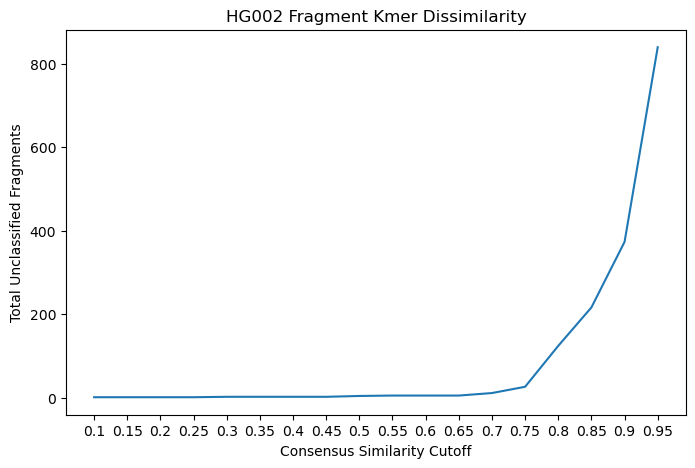

In [63]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 8,5
cutOffList = [[x,y] for x,y in CutoffDict.items()]
cutoffDF = pd.DataFrame(data=cutOffList, columns=['Similarity', 'Unknowns'])

sns.lineplot(data=cutoffDF, x='Similarity', y='Unknowns')

plt.title("HG002 Fragment Kmer Dissimilarity")
plt.xlabel("Consensus Similarity Cutoff")
plt.ylabel("Total Unclassified Fragments")

#plt.savefig("/home/mark/Desktop/chromosome_y/Images/DYZ1/HaeIII_Fragments/HG002_kmer_Fragments.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [64]:
#Compare Fragments to Fragments

myCons = {'Yqhet_3k1bp':[], 'DYZ18_Yq':[], 'DYZ1_Yq':[], 'Yqhet_2k7bp':[], 'Other':[]}

for x in myDict.keys():
    
    
    currentLeader = 0.75
    currentName = 'Other'
    
    for consensus in myDict[x].keys():
    
        if float(myDict[x][consensus]) > currentLeader:
            currentLeader = float(myDict[x][consensus])
            currentName = consensus
        else:
            continue
            
    myCons[currentName].append(x)


for cons in myCons.keys():
    
    fragmentList = [x for x in myCons[cons]]

    Run = 0
    while len(fragmentList) > 0:

        currentTarget = fragmentList.pop(0)

        myDict = {}
        for x in fragmentList:
            myDict[x]= 1-float(distance.braycurtis(list(abundanceKmer.loc[x]), list(abundanceKmer.loc[currentTarget])))

        tempList = []
        tempList.append(currentTarget)

        for x,y in myDict.items():
            if y > .75:
                tempList.append(x)
                fragmentList.remove(x)
            else:
                continue

        with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HG002/myConBins/'+str(cons)+"_"+str(Run)+'.fasta', 'a+') as file:
            for row in tempList:
                if OrientationDict[row] == 'C':
                    file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/T2T.chrY.fasta', "chrY:"+str(row.split("chrY:")[1])))
                else:
                    file.write(str(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/T2T.chrY.fasta', "chrY:"+str(row.split("chrY:")[1]))).split("\n")[0]+'\n')
                    string = Seq(''.join(str(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/T2T.chrY.fasta', "chrY:"+str(row.split("chrY:")[1]))).split("\n")[1:]))
                    file.write(str(string.reverse_complement())+'\n')
        file.close()

        Run+=1
    

In [67]:
rb_df['Identity'] = 'temp'
for row in rb_df.index:
    rb_df.at[row,'Identity'] = 'chrY:'+str(rb_df.at[row,'Start'])+"-"+str(rb_df.at[row,'End'])
rb_df.set_index("Identity", inplace=True)
rb_df

,SpacerBlock,Length,Start,End,Orientation,Color
Identity,,,,,,
chrY:27462683-27616714,0,154032,27462683,27616714,C,temp
chrY:27616715-27617832,0,1118,27616715,27617832,C,temp
chrY:27617833-27619850,0,2018,27617833,27619850,C,temp
chrY:27619851-27620959,0,1109,27619851,27620959,C,temp
chrY:27620960-27622986,0,2027,27620960,27622986,C,temp
...,...,...,...,...,...,...
chrY:61987895-61991390,42,3496,61987895,61991390,C,temp
chrY:61991391-61994889,42,3499,61991391,61994889,C,temp
chrY:61994890-61998433,42,3544,61994890,61998433,C,temp


In [68]:
rb_df['Color'] = 'temp'
for (dirpath, dirnames, filenames) in walk("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HG002/myConBins/"):
    for name in filenames:
        print(name)
        
        file1 = open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HG002/myConBins/'+name, 'r')
        Lines = file1.readlines()

        for line in tqdm(Lines): 
            if '>' in line:
                print(line)
                if 'Other' in name:
                    rb_df.at[str(line.split(">")[1].strip()), 'Color'] = 'lime'
                elif 'DYZ1_Yq' in name:
                    rb_df.at[str(line.split(">")[1].strip()), 'Color'] = 'black'
                    
                elif 'DYZ18_Yq' in name:
                    rb_df.at[str(line.split(">")[1].strip()), 'Color'] = 'grey'
                    
                elif 'Yqhet_2k7bp' in name:
                    rb_df.at[str(line.split(">")[1].strip()), 'Color'] = 'cyan'
                    
                elif 'Yqhet_3k1bp' in name:
                    rb_df.at[str(line.split(">")[1].strip()), 'Color'] = 'red'
                    
                else:
                    print("IDK")
    
            else:
                continue

Other_4.fasta


100%|██████████████████████████████████████████| 8/8 [00:00<00:00, 14697.52it/s]


>chrY:44140303-44140697

Other_2.fasta


100%|██████████████████████████████████████████| 4/4 [00:00<00:00, 52593.15it/s]


>chrY:29386058-29386192

Other_0.fasta


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 28055.55it/s]


>chrY:28686562-28686721

Other_1.fasta


100%|█████████████████████████████████████| 152/152 [00:00<00:00, 504777.68it/s]


>chrY:29197783-29200666

>chrY:29356078-29358964

>chrY:41531225-41534118

>chrY:46763258-46766151

Other_3.fasta


100%|█████████████████████████████████████| 111/111 [00:00<00:00, 271785.02it/s]


>chrY:30217832-30218166

>chrY:37318420-37318855

>chrY:38003834-38004122

>chrY:39886732-39887167

>chrY:45133745-45134180

>chrY:49207235-49207539

>chrY:49210779-49211083

>chrY:49221444-49221748

>chrY:49224988-49225292

>chrY:50076859-50077148

>chrY:55706250-55706539

>chrY:55716951-55717240

>chrY:55741898-55742187

>chrY:55770459-55770748

>chrY:55954138-55954442

>chrY:61035917-61036206

Yqhet_3k1bp_0.fasta


100%|███████████████████████████████████| 2090/2090 [00:00<00:00, 613313.89it/s]


>chrY:27616715-27617832

>chrY:27619851-27620959

>chrY:27622987-27625685

>chrY:27625686-27628816

>chrY:27628817-27629930

>chrY:27631948-27635068

>chrY:27635069-27636182

>chrY:27638210-27642444

>chrY:27644462-27647582

>chrY:27647583-27648696

>chrY:27650714-27653834

>chrY:27653835-27654948

>chrY:27656976-27661204

>chrY:27661205-27664311

>chrY:27666309-27704739

>chrY:27704740-27710955

>chrY:27710956-27734780

>chrY:27734781-27753437

>chrY:27753438-27756544

DYZ18_Yq_0.fasta


100%|███████████████████████████████████| 2569/2569 [00:00<00:00, 792466.50it/s]


>chrY:27462683-27616714

Other_6.fasta


100%|███████████████████████████████████████| 11/11 [00:00<00:00, 123032.92it/s]


>chrY:61690644-61691211

Yqhet_2k7bp_0.fasta


100%|███████████████████████████████████| 2476/2476 [00:00<00:00, 793118.73it/s]


>chrY:27756545-27891814

>chrY:27891815-27904939

Yqhet_3k1bp_1.fasta


100%|█████████████████████████████████████| 280/280 [00:00<00:00, 523586.77it/s]


>chrY:27617833-27619850

>chrY:27620960-27622986

>chrY:27629931-27631947

>chrY:27636183-27638209

>chrY:27642445-27644461

>chrY:27648697-27650713

>chrY:27654949-27656975

>chrY:27664312-27666308

DYZ1_Yq_0.fasta


 18%|█████▋                          | 57867/328372 [00:00<00:00, 578636.06it/s]

>chrY:27904940-27908467

>chrY:27908468-27912011

>chrY:27912012-27915580

>chrY:27915581-27919109

>chrY:27919110-27922683

>chrY:27922684-27926212

>chrY:27926213-27929786

>chrY:27929787-27933360

>chrY:27933361-27936889

>chrY:27936890-27940467

>chrY:27940468-27944001

>chrY:27944002-27947580

>chrY:27947581-27951114

>chrY:27951115-27954688

>chrY:27954689-27958263

>chrY:27958264-27961787

>chrY:27961788-27965316

>chrY:27965317-27968851

>chrY:27968852-27972380

>chrY:27972381-27975909

>chrY:27975910-27979483

>chrY:27979484-27983022

>chrY:27983023-27986596

>chrY:27986597-27990140

>chrY:27990141-27993714

>chrY:27993715-27997287

>chrY:27997288-28000860

>chrY:28000861-28004404

>chrY:28004405-28007963

>chrY:28007964-28011537

>chrY:28011538-28015111

>chrY:28015112-28018685

>chrY:28018686-28022259

>chrY:28022260-28025833

>chrY:28025834-28029366

>chrY:28029367-28032900

>chrY:28032901-28036433

>chrY:28036434-28041811

>chrY:28041812-28045345

>chrY:28045346-28048874



>chrY:36246946-36250499

>chrY:36250500-36257587

>chrY:36257588-36261090

>chrY:36261091-36264628

>chrY:36264629-36268152

>chrY:36268153-36275240

>chrY:36275241-36278779

>chrY:36278780-36282327

>chrY:36282328-36285881

>chrY:36285882-36289430

>chrY:36289431-36292954

>chrY:36292955-36296518

>chrY:36296519-36300092

>chrY:36300093-36303665

>chrY:36303666-36307214

>chrY:36307215-36310782

>chrY:36310783-36314327

>chrY:36314328-36317899

>chrY:36317900-36321452

>chrY:36321453-36325011

>chrY:36325012-36328574

>chrY:36328575-36332137

>chrY:36332138-36335706

>chrY:36335707-36339300

>chrY:36339301-36342839

>chrY:36342840-36346433

>chrY:36346434-36349972

>chrY:36349973-36353551

>chrY:36353552-36357124

>chrY:36357125-36360688

>chrY:36360689-36364232

>chrY:36364233-36367781

>chrY:36367782-36371335

>chrY:36371336-36374903

>chrY:36374904-36378457

>chrY:36378458-36382026

>chrY:36382027-36384087

>chrY:36384088-36387661

>chrY:36387662-36389722

>chrY:36389723-36393311



 65%|████████████████████▏          | 213864/328372 [00:00<00:00, 721358.84it/s]


>chrY:38793508-38797021

>chrY:38797022-38797840

>chrY:38797841-38800534

>chrY:38800535-38804078

>chrY:38804079-38807612

>chrY:38807613-38811171

>chrY:38811172-38814705

>chrY:38814706-38818259

>chrY:38818260-38821807

>chrY:38821808-38825361

>chrY:38825362-38828910

>chrY:38828911-38832478

>chrY:38832479-38836052

>chrY:38836053-38839630

>chrY:38839631-38843179

>chrY:38843180-38846747

>chrY:38846748-38850301

>chrY:38850302-38853873

>chrY:38853874-38857426

>chrY:38857427-38860980

>chrY:38860981-38864543

>chrY:38864544-38868126

>chrY:38868127-38871655

>chrY:38871656-38875224

>chrY:38875225-38878818

>chrY:38878819-38882357

>chrY:38882358-38885936

>chrY:38885937-38889509

>chrY:38889510-38893073

>chrY:38893074-38896603

>chrY:38896604-38900167

>chrY:38900168-38903711

>chrY:38903712-38907270

>chrY:38907271-38910800

>chrY:38910801-38914364

>chrY:38914365-38917908

>chrY:38917909-38921467

>chrY:38921468-38925026

>chrY:38925027-38928594

>chrY:38928595-38932158


 95%|█████████████████████████████▎ | 310415/328372 [00:00<00:00, 815458.08it/s]

>chrY:57585080-57588641

>chrY:57588642-57592195

>chrY:57592196-57595778

>chrY:57595779-57599352

>chrY:57599353-57602914

>chrY:57602915-57606468

>chrY:57606469-57610007

>chrY:57610008-57613566

>chrY:57613567-57617119

>chrY:57617120-57620678

>chrY:57620679-57624237

>chrY:57624238-57631374

>chrY:57631375-57638487

>chrY:57638488-57642046

>chrY:57642047-57645605

>chrY:57645606-57649163

>chrY:57649164-57652736

>chrY:57652737-57656294

>chrY:57656295-57658516

>chrY:57658517-57659863

>chrY:57659864-57663427

>chrY:57663428-57667000

>chrY:57667001-57670574

>chrY:57670575-57674153

>chrY:57674154-57676054

>chrY:57676055-57677702

>chrY:57677703-57681256

>chrY:57681257-57684815

>chrY:57684816-57688374

>chrY:57688375-57691948

>chrY:57691949-57695527

>chrY:57695528-57699101

>chrY:57699102-57702670

>chrY:57702671-57706234

>chrY:57706235-57708451

>chrY:57708452-57709793

>chrY:57709794-57713367

>chrY:57713368-57716935

>chrY:57716936-57720494

>chrY:57720495-57724068



100%|███████████████████████████████| 328372/328372 [00:00<00:00, 785339.33it/s]


>chrY:59598324-59601882

>chrY:59601883-59609019

>chrY:59609020-59616137

>chrY:59616138-59619696

>chrY:59619697-59623254

>chrY:59623255-59626816

>chrY:59626817-59630390

>chrY:59630391-59633948

>chrY:59633949-59636170

>chrY:59636171-59637512

>chrY:59637513-59641076

>chrY:59641077-59644644

>chrY:59644645-59648218

>chrY:59648219-59651797

>chrY:59651798-59653698

>chrY:59653699-59655346

>chrY:59655347-59658900

>chrY:59658901-59662459

>chrY:59662460-59666018

>chrY:59666019-59669592

>chrY:59669593-59673171

>chrY:59673172-59676745

>chrY:59676746-59680314

>chrY:59680315-59683878

>chrY:59683879-59686095

>chrY:59686096-59687437

>chrY:59687438-59691021

>chrY:59691022-59694585

>chrY:59694586-59698159

>chrY:59698160-59700060

>chrY:59700061-59701723

>chrY:59701724-59705292

>chrY:59705293-59708846

>chrY:59708847-59710747

>chrY:59710748-59712405

>chrY:59712406-59715964

>chrY:59715965-59719543

>chrY:59719544-59723122

>chrY:59723123-59726696

>chrY:59726697-59730265



100%|██████████████████████████████████████████| 4/4 [00:00<00:00, 36080.03it/s]


>chrY:62001967-62002117

DYZ1_Yq_1.fasta


100%|████████████████████████████████████████| 55/55 [00:00<00:00, 24203.83it/s]


>chrY:52274538-52275102

>chrY:53802851-53803415

>chrY:57496107-57496671

>chrY:59448929-59449493

>chrY:61931752-61932306

Other_5.fasta


100%|███████████████████████████████████████████| 2/2 [00:00<00:00, 9393.74it/s]

>chrY:61466819-61466843



In [69]:
rb_df

,SpacerBlock,Length,Start,End,Orientation,Color
Identity,,,,,,
chrY:27462683-27616714,0,154032,27462683,27616714,C,grey
chrY:27616715-27617832,0,1118,27616715,27617832,C,red
chrY:27617833-27619850,0,2018,27617833,27619850,C,red
chrY:27619851-27620959,0,1109,27619851,27620959,C,red
chrY:27620960-27622986,0,2027,27620960,27622986,C,red
...,...,...,...,...,...,...
chrY:61987895-61991390,42,3496,61987895,61991390,C,black
chrY:61991391-61994889,42,3499,61991391,61994889,C,black
chrY:61994890-61998433,42,3544,61994890,61998433,C,black


In [70]:
for color in set(rb_df['Color']):
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/Con_Seqs/'+str(color)+".fasta", 'a+') as file:
        for row in rb_df[rb_df['Color']==color].index:
            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/T2T.chrY.fasta', str(row)))
    file.close()
        

In [71]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/Con_Seqs/black.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/Con_Seqs/DYZ1.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                #file2.write(">"+str(line.split("0000749.")[1]))
                file2.write(line)

            else:
                file2.write(line)
    file2.close()
file.close()

100%|██████████████████████████████| 340803/340803 [00:00<00:00, 1058145.17it/s]


In [72]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/Con_Seqs/grey.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/Con_Seqs/DYZ18.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                #file2.write(">"+str(line.split("0000749.")[1]))
                file2.write(line)

            else:
                file2.write(line)
    file2.close()
file.close()

100%|███████████████████████████████████| 2569/2569 [00:00<00:00, 502151.50it/s]


In [73]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/Con_Seqs/cyan.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/Con_Seqs/2kbp.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                #file2.write(">"+str(line.split("0000749.")[1]))
                file2.write(line)

            else:
                file2.write(line)
    file2.close()
file.close()

100%|███████████████████████████████████| 2476/2476 [00:00<00:00, 551899.70it/s]


In [74]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/Con_Seqs/red.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/Con_Seqs/3kbp.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                #file2.write(">"+str(line.split("0000749.")[1]))
                file2.write(line)

            else:
                file2.write(line)
    file2.close()
file.close()

100%|███████████████████████████████████| 2370/2370 [00:00<00:00, 507764.24it/s]


In [75]:
#rb_df.to_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/DYZ1_dataframe.csv")

In [7]:
rb_df = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/DYZ1_dataframe.csv").set_index("Identity")
rb_df

,SpacerBlock,Length,Start,End,Orientation,Color
Identity,,,,,,
chrY:27462683-27616714,0,154032,27462683,27616714,C,grey
chrY:27616715-27617832,0,1118,27616715,27617832,C,red
chrY:27617833-27619850,0,2018,27617833,27619850,C,red
chrY:27619851-27620959,0,1109,27619851,27620959,C,red
chrY:27620960-27622986,0,2027,27620960,27622986,C,red
...,...,...,...,...,...,...
chrY:61987895-61991390,42,3496,61987895,61991390,C,black
chrY:61991391-61994889,42,3499,61991391,61994889,C,black
chrY:61994890-61998433,42,3544,61994890,61998433,C,black


In [8]:
blockDefine = {x:{'Start':0, 'End':0} for x in set(rb_df['SpacerBlock'])}
for block in blockDefine.keys():
    blockDefine[block]['Start'] = int(rb_df[rb_df['SpacerBlock']==block].index[0].split("-")[0].split(":")[1])
    blockDefine[block]['End'] = int(rb_df[rb_df['SpacerBlock']==block].index[-1].split("-")[1])
blockDefine

{0: {'Start': 27462683, 'End': 28660073},
 1: {'Start': 28686562, 'End': 29200666},
 2: {'Start': 29239366, 'End': 29320751},
 3: {'Start': 29356078, 'End': 30970141},
 4: {'Start': 31197828, 'End': 31849744},
 5: {'Start': 32018112, 'End': 32840470},
 6: {'Start': 33089758, 'End': 33304751},
 7: {'Start': 33544623, 'End': 34544016},
 8: {'Start': 35727722, 'End': 36090299},
 9: {'Start': 36170541, 'End': 36446096},
 10: {'Start': 36601339, 'End': 36962296},
 11: {'Start': 37064475, 'End': 37332529},
 12: {'Start': 37586847, 'End': 38042676},
 13: {'Start': 38272788, 'End': 38635464},
 14: {'Start': 38727801, 'End': 39006879},
 15: {'Start': 39169386, 'End': 39473476},
 16: {'Start': 39590173, 'End': 39897297},
 17: {'Start': 40183036, 'End': 40686702},
 18: {'Start': 41531225, 'End': 42579144},
 19: {'Start': 43446246, 'End': 43798098},
 20: {'Start': 43921863, 'End': 44190151},
 21: {'Start': 44347803, 'End': 44648351},
 22: {'Start': 44762620, 'End': 45144310},
 23: {'Start': 454953

In [6]:
goodColors = ['cyan', 'red', 'grey']
for block in set(rb_df['SpacerBlock']):
    if str(block) == '0':
        
        for color in set(rb_df['Color']):
            if color in goodColors:
                with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/Con_Seqs/Color_Blocks/'+str(color)+"_block.fasta", 'a+') as file:
                    Start= str(list(rb_df[(rb_df['SpacerBlock']==block) & (rb_df['Color']==color)].index)[0].split("-")[0].split(":")[1])
                    if color == 'red':
                        End = str(27810521)
                    else:
                        End =str(list(rb_df[(rb_df['SpacerBlock']==block) & (rb_df['Color']==color)].index)[-1].split("-")[1])
                    file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/T2T.chrY.fasta', "chrY:"+Start+"-"+End))
                file.close()
                
            elif color == 'black':
                with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/Con_Seqs/Color_Blocks/black_block.fasta', 'a+') as file:
                    Start= str(list(rb_df[(rb_df['SpacerBlock']==block) & (rb_df['Color']==color)].index)[0].split("-")[0].split(":")[1])
                    End =str(list(rb_df[(rb_df['SpacerBlock']==block)].index)[-1].split("-")[1])
                    file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/T2T.chrY.fasta', "chrY:"+Start+"-"+End))
                file.close()
                
            else:
                continue
    else:
        with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/Con_Seqs/Color_Blocks/black_block.fasta', 'a+') as file:
            Start= str(list(rb_df[(rb_df['SpacerBlock']==block)].index)[0].split("-")[0].split(":")[1])
            End =str(list(rb_df[(rb_df['SpacerBlock']==block)].index)[-1].split("-")[1])
            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/T2T.chrY.fasta', "chrY:"+Start+"-"+End))
        file.close()

In [100]:
sizeDict = {'DYZ1_Yq': 3569, 'DYZ18_Yq': 2864, 'Yqhet_3k1bp':3120, 'Yqhet_2k7bp': 2767}

In [9]:
DYZ18Dict = {x:[] for x in set(rb_df[rb_df['Color']=='grey'].index)}
DYZ1Dict = {x:[] for x in set(rb_df[rb_df['Color']=='black'].index)}
k3bpDict = {x:[] for x in set(rb_df[rb_df['Color']=='red'].index)}
k2bpDict = {x:[] for x in set(rb_df[rb_df['Color']=='cyan'].index)}

In [10]:
DYZ18_tempList = []

#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/Con_Seqs/HMMER/DYZ18_hmmer.tsv', 'r') as file:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/Con_Seqs/Color_Blocks/HMMER/DYZ18_hmmer.tsv', 'r') as file:

    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            if info[8] == '-':
                DYZ18_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), '+', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                DYZ18_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), 'C', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

DYZ18_hmmer2 = pd.DataFrame(data=DYZ18_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
DYZ18_hmmer = DYZ18_hmmer2[DYZ18_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
DYZ18_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
17,chrY:27462683-27616714,4,2864,2,2852,C,0.0,2463.9,2850
27,chrY:27462683-27616714,2,2864,2854,5696,C,0.0,2448.0,2842
50,chrY:27462683-27616714,2,2864,5698,8544,C,0.0,2405.6,2846
40,chrY:27462683-27616714,2,2864,8546,11392,C,0.0,2436.5,2846
0,chrY:27462683-27616714,2,2864,11394,14256,C,0.0,2513.2,2862
6,chrY:27462683-27616714,2,2864,14258,17123,C,0.0,2479.0,2865
1,chrY:27462683-27616714,2,2864,17125,19996,C,0.0,2505.3,2871
8,chrY:27462683-27616714,2,2864,19998,22864,C,0.0,2471.6,2866
4,chrY:27462683-27616714,2,2864,22866,25737,C,0.0,2486.6,2871
52,chrY:27462683-27616714,2,2680,25739,28417,C,0.0,2261.5,2678


In [11]:
DYZ1_tempList = []

#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/Con_Seqs/HMMER/DYZ1_hmmer.tsv', 'r') as file:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/Con_Seqs/Color_Blocks/HMMER/DYZ1_hmmer.tsv', 'r') as file:

    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            if info[8] == '-':
                DYZ1_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), 'C', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                DYZ1_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), '+', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

DYZ1_hmmer2 = pd.DataFrame(data=DYZ1_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
DYZ1_hmmer = DYZ1_hmmer2[DYZ1_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
DYZ1_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
4314,chrY:27904940-28660073,1,3569,1,3528,C,0.0,3054.8,3527
5414,chrY:61153790-61389881,500,3569,2,3052,+,0.0,2693.1,3050
5244,chrY:28686562-29200666,1,3567,159,3713,+,0.0,2907.0,3554
5586,chrY:41531225-42579144,1,2114,886,2894,C,0.0,1645.3,2008
5587,chrY:46763258-47729648,1,2114,886,2894,C,0.0,1645.3,2008
...,...,...,...,...,...,...,...,...,...
2864,chrY:29356078-30970141,1,3569,1596832,1600375,C,0.0,3102.7,3543
3021,chrY:29356078-30970141,1,3569,1600376,1603919,C,0.0,3099.9,3543
2458,chrY:29356078-30970141,1,3569,1603920,1607468,C,0.0,3110.8,3548
3293,chrY:29356078-30970141,1,3569,1607469,1611002,C,0.0,3094.1,3533


In [13]:
k3_tempList = []

#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/Con_Seqs/HMMER/Yq_3kbp_hmmer_extra.tsv', 'r') as file:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/Con_Seqs/Color_Blocks/HMMER/Yq_3kbp_hmmer.tsv', 'r') as file:

    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            if info[8] == '-':
                k3_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), '+', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                k3_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), 'C', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

k3_hmmer2 = pd.DataFrame(data=k3_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
k3_hmmer = k3_hmmer2[k3_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
k3_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
46,chrY:27616715-27810521,609,3119,1729,4223,C,0.0,2225.6,2494
4,chrY:27616715-27810521,2,3119,4223,7364,C,0.0,2770.8,3141
54,chrY:27616715-27810521,1229,3119,8174,10063,C,0.0,1689.9,1889
11,chrY:27616715-27810521,2,3119,10063,13194,C,0.0,2751.3,3131
6,chrY:27616715-27810521,2,3119,13194,16325,C,0.0,2769.6,3131
9,chrY:27616715-27810521,2,3119,16325,19446,C,0.0,2755.6,3121
0,chrY:27616715-27810521,2,3119,19446,22587,C,0.0,2777.1,3141
10,chrY:27616715-27810521,2,3119,22587,25708,C,0.0,2755.6,3121
2,chrY:27616715-27810521,2,3119,25708,28839,C,0.0,2771.4,3131
7,chrY:27616715-27810521,2,3119,28839,31960,C,0.0,2759.8,3121


In [14]:
k2_tempList = []

#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/Con_Seqs/HMMER/Yq_2k7bp_hmmer.tsv', 'r') as file:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/Con_Seqs/Color_Blocks/HMMER/Yq_2k7bp_hmmer.tsv', 'r') as file:

    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            #Normally antisense
            if info[8] == '-':
                k2_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), '+', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                k2_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), 'C', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

k2_hmmer2 = pd.DataFrame(data=k2_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
k2_hmmer = k2_hmmer2[k2_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
k2_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
34,chrY:27756545-27904939,2,1312,53976,55276,C,0.0,1035.7,1300
33,chrY:27756545-27904939,1271,2766,55265,56765,C,0.0,1317.1,1500
31,chrY:27756545-27904939,2,2334,56765,59087,C,0.0,2082.0,2322
20,chrY:27756545-27904939,2,2766,59804,62573,C,0.0,2478.1,2769
0,chrY:27756545-27904939,2,2766,62573,65337,C,0.0,2520.7,2764
24,chrY:27756545-27904939,2,2766,65337,68100,C,0.0,2465.4,2763
18,chrY:27756545-27904939,2,2766,68100,70869,C,0.0,2491.8,2769
12,chrY:27756545-27904939,2,2766,70869,73633,C,0.0,2498.3,2764
26,chrY:27756545-27904939,2,2766,73633,76360,C,0.0,2460.8,2727
19,chrY:27756545-27904939,2,2766,76360,79094,C,0.0,2479.2,2734


In [15]:
DYZ18_hmmer['Start']=0
DYZ1_hmmer['Start']=0
k3_hmmer['Start']=0
k2_hmmer['Start']=0

DYZ18_hmmer['End']=0
DYZ1_hmmer['End']=0
k3_hmmer['End']=0
k2_hmmer['End']=0

DYZ18_hmmer['Color']='grey'
DYZ1_hmmer['Color']='black'
k3_hmmer['Color']='red'
k2_hmmer['Color']='cyan'

DYZ18_hmmer['SpacerBlock']=0
DYZ1_hmmer['SpacerBlock']=0
k3_hmmer['SpacerBlock']=0
k2_hmmer['SpacerBlock']=0

In [16]:
for row in DYZ18_hmmer.index:
    DYZ18_hmmer.at[row,'Start'] = int(DYZ18_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ18_hmmer.at[row,'fstart'])
    DYZ18_hmmer.at[row,'End'] = int(DYZ18_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ18_hmmer.at[row,'fend'])
for row in DYZ1_hmmer.index:
    DYZ1_hmmer.at[row,'Start'] = int(DYZ1_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ1_hmmer.at[row,'fstart'])
    DYZ1_hmmer.at[row,'End'] = int(DYZ1_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ1_hmmer.at[row,'fend'])
for row in k3_hmmer.index:
    k3_hmmer.at[row,'Start'] = int(k3_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k3_hmmer.at[row,'fstart'])
    k3_hmmer.at[row,'End'] = int(k3_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k3_hmmer.at[row,'fend'])
for row in k2_hmmer.index:
    k2_hmmer.at[row,'Start'] = int(k2_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k2_hmmer.at[row,'fstart'])
    k2_hmmer.at[row,'End'] = int(k2_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k2_hmmer.at[row,'fend'])

In [19]:
LimeDF = rb_df[rb_df['Color']=="lime"].reset_index().rename(columns={'Identity':'Fragment'}).copy()

In [20]:
concattd = [DYZ18_hmmer, k3_hmmer,k2_hmmer,DYZ1_hmmer ]
newDF = pd.concat(concattd).drop(columns=['qstart', 'qend','fstart','fend','evalue','score'])
newDF.rename(columns={'orientation':"Orientation"}, inplace=True)
finalList = [newDF, LimeDF]
finalDF2 = pd.concat(finalList)
finalDF = finalDF2[finalDF2['Color']!='lime'].copy()
finalDF.sort_values(by='Start', ascending=True, inplace=True)

In [21]:
finalDF.reset_index(inplace=True)

In [22]:
for row in finalDF.index:
    for block in blockDefine.keys():
        if int(finalDF.at[row,'Start']) >= int(blockDefine[block]['Start']) and int(finalDF.at[row,'End']) <= int(blockDefine[block]['End']):
            finalDF.at[row,'SpacerBlock']= block
        else:
            continue

In [18]:
#for row in finalDF.index:
#    if str(finalDF.at[row,'Fragment']).strip() in list(rb_df.index):
#        finalDF.at[row,'SpacerBlock'] = rb_df.at[str(finalDF.at[row,'Fragment']),'SpacerBlock']
#    else:
#        continue
#finalDF

In [96]:
finalDF[finalDF['SpacerBlock']==0].iloc[[97]]

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
97,42,chrY:27753438-27756544,C,2025,27754520,27756545,red,0


In [97]:
finalDF[finalDF['SpacerBlock']==0].iloc[[98]]

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
98,34,chrY:27756545-27891814,C,1300,27810521,27811821,cyan,0


In [98]:
27810521-27756545

53976

In [23]:
lapList = []
overlaps = []
for spacerblock in set(finalDF['SpacerBlock']):
    tempDF = finalDF[finalDF['SpacerBlock']==spacerblock].copy()
    i=0
    while i < len(tempDF.index):
        try:
            lapList.append(int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']))
            if int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']) < 0 or int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']) > 40000:
                print(spacerblock)
                print(int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']))
                print(i)
                overlaps.append(int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']))
                print('\n')
            i+=1
        except:
            i+=1
            continue
#lapList

0
-11
114


0
-15
186


0
-25
361


1
-16
31


1
-23
32


1
-16
33


1
-13
34


1
-18
35


1
-20
36


1
-13
37


1
-14
38


1
-13
39


1
-13
40


1
-13
41


1
-13
42


1
-20
43


1
-12
44


1
-23
45


1
-11
75


1
-11
79


1
-11
85


1
-11
98


3
-31
93


3
-14
101


3
-16
137


3
-9
142


3
-18
158


3
-8
171


3
-13
178


3
-9
295


3
-18
314


3
-8
328


3
-13
335


3
-18
428


3
-26
430


3
-25
431


3
-7
453


3
-25
455


3
-25
461


4
-17
0


4
-13
3


4
-23
91


4
-25
130


4
-25
132


4
-25
135


4
-25
149


4
-25
151


5
-26
0


6
-17
0


7
-18
0


8
-26
0


9
-32
0


10
-19
0


11
-18
0


12
-18
0


13
-26
0


14
-19
0


15
-20
0


16
-31
0


17
-19
0


17
-10
84


17
-17
107


17
-19
108


19
-26
0


20
-20
0


21
-26
0


22
-16
0


22
-21
95


23
-18
0


23
-10
58


23
-9
85


23
-17
103


25
-29
0


26
-31
0


26
-19
64


26
-25
107


26
-28
131


27
-20
0


28
-23
25


28
-9
35


28
-8
38


29
-32
0


29
-7
99


29
-13
116


30
-23
0


30
-11
39


31
-32
0


31
-9
101


3

In [24]:
print(len(overlaps))

115


(array([ 5.,  3.,  0.,  3.,  1.,  9., 12.,  5.,  0.,  3., 10., 11.,  9.,
         6.,  3., 11.,  9.,  3.,  5.,  7.]),
 array([-33. , -31.7, -30.4, -29.1, -27.8, -26.5, -25.2, -23.9, -22.6,
        -21.3, -20. , -18.7, -17.4, -16.1, -14.8, -13.5, -12.2, -10.9,
         -9.6,  -8.3,  -7. ]),
 <BarContainer object of 20 artists>)

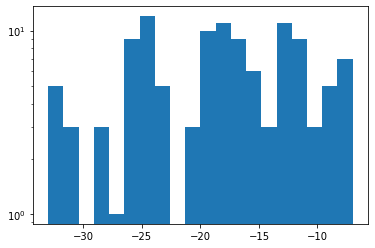

In [25]:
plt.hist(overlaps, log=True, bins=20)

3907
-33


(array([5.699e+03, 3.000e+01, 1.700e+01, 1.900e+01, 3.900e+01, 1.400e+01,
        2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([ -33.,  164.,  361.,  558.,  755.,  952., 1149., 1346., 1543.,
        1740., 1937., 2134., 2331., 2528., 2725., 2922., 3119., 3316.,
        3513., 3710., 3907.]),
 <BarContainer object of 20 artists>)

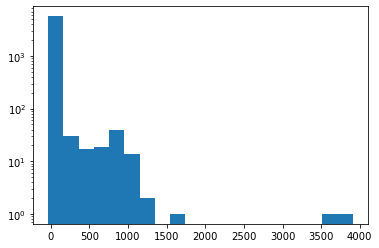

In [26]:
print(max(lapList))
print(min(lapList))

plt.hist(lapList, log=True, bins=20)

In [27]:
#rb_dfold = rb_df.copy()
rb_df = finalDF.copy()

# Export and update

In [118]:
rb_df[(rb_df['SpacerBlock']==0) & (rb_df['Color']=='black')]

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
148,4193,chrY:27904940-27908467,C,3527,27904941,27908468,black,0
149,4246,chrY:27908468-27912011,C,3543,27908469,27912012,black,0
150,3259,chrY:27912012-27915580,C,3568,27912013,27915581,black,0
151,3889,chrY:27915581-27919109,C,3528,27915582,27919110,black,0
152,3453,chrY:27919110-27922683,C,3573,27919111,27922684,black,0
...,...,...,...,...,...,...,...,...
365,4268,chrY:28642109-28645642,C,3533,28642110,28645643,black,0
366,3724,chrY:28645643-28649186,C,3543,28645644,28649187,black,0
367,4873,chrY:28649187-28652700,C,3513,28649188,28652701,black,0
368,5104,chrY:28653646-28657779,C,3240,28654540,28657780,black,0


In [131]:
tempDF.at[0,'Start']=27904941
tempDF.at[0,'Length']= (28660072-27904941)
tempDF

,Block_Number,Block_Type,Length,Start,End,SampleName
0,0,Spacer Block,755131,27904941,28660072,HG002
1,0,Repeat Block,26488,28660073,28686560,HG002
2,1,Spacer Block,514105,28686561,29200665,HG002
3,1,Repeat Block,38699,29200666,29239364,HG002
4,2,Spacer Block,81386,29239365,29320750,HG002
...,...,...,...,...,...,...
81,40,Repeat Block,61620,61389881,61451500,HG002
82,41,Spacer Block,239710,61451501,61691210,HG002
83,41,Repeat Block,23386,61691211,61714596,HG002
84,42,Spacer Block,287520,61714597,62002116,HG002


In [37]:
#rb_df.to_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/Finalized_Fragmentdf.csv")

In [134]:
#tempDF.to_csv("/home/mark/Desktop/chromosome_y/Dataframes/T2T/BlockSize_dataframe.csv")

## Visualize

In [45]:
import turtle

In [47]:
turtle.position()
turtle.color('black')
turtle.speed(0)
flag=1
groupFlag = 0
#groupNames = list(goodAluGroupDict.keys())
lengthFlag = 0

startPosition = turtle.position()
turtle.color("white")
turtle.setposition(turtle.pos()[0], turtle.pos()[1]+300)
turtle.color("black")
turtle.write("HG002 Yq Heterochromatin Spacer Blocks", align="Left")
turtle.color("white")
turtle.setposition(startPosition)

for key in tqdm(list(set(rb_df['SpacerBlock']))[24:]):
    
    totalAlus = len(rb_df[rb_df['SpacerBlock']==key])
        
    turtle.color("black")
    turtle.forward(75)
    currentPosition = turtle.position()
    

    if lengthFlag == 0:
        turtle.setposition(currentPosition)
    else:
        #turtle.setposition(turtle.pos()[0]-10, turtle.pos()[1]+20)
        #turtle.write(str(BlockListDistance[key]), align="right")
        turtle.setposition(currentPosition)

    currentPosition = turtle.position()
    if (flag % 2) == 0:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]-200)
    else:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]+200)
        
    turtle.write(" Spacer Block: "+str(key), align="left")

    turtle.setposition(currentPosition)
    

    groupFlag+=1
    lengthFlag+=1
    flag+=1
    
    tempDF = rb_df[rb_df['SpacerBlock']==key].copy() 
    for item in tempDF.index:
        
        if tempDF.at[item,'Orientation'] == 'C':
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.left(90)
            turtle.forward(1)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.right(90)
            turtle.forward(.5)
        
        elif tempDF.at[item,'Orientation'] == '+':
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.left(90)
            turtle.forward(.5)

        elif tempDF.at[item,'Orientation'] == 'temp':
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.left(90)
            turtle.forward(.5)
        
        else:
            turtle.color('black')
            turtle.forward(.5)


100%|███████████████████████████████████████████| 19/19 [04:22<00:00, 13.81s/it]


In [48]:
from PIL import Image

In [49]:
def save_as_png(canvas,fileName):
    # save postscipt image 
    canvas.postscript(file = fileName + '.eps') 
    # use PIL to convert to PNG 
    img = Image.open(fileName + '.eps') 
    img.save(fileName + '.png', 'png') 

In [50]:
ts = turtle.getscreen()
save_as_png(ts.getcanvas(),"/home/mark/Desktop/chromosome_y/Images/T2T/HG002_YqHeterochromatin_DYZ1_HMMER_part2_finalized")

In [51]:
turtle.bye()